<a href="https://colab.research.google.com/github/rajatdhanotiya/Hand-Written-Digit-Classifier/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
import seaborn as sns

from struct import unpack

%matplotlib inline

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
from mlxtend.data import loadlocal_mnist

train_img, train_lbl = loadlocal_mnist(
        images_path='/content/drive/My Drive/projectdata/mldata/train-images.idx3-ubyte', 
        labels_path='/content/drive/My Drive/projectdata/mldata/train-labels.idx1-ubyte')

test_img, test_lbl = loadlocal_mnist(
        images_path='/content/drive/My Drive/projectdata/mldata/t10k-images.idx3-ubyte', 
        labels_path='/content/drive/My Drive/projectdata/mldata/t10k-labels.idx1-ubyte')

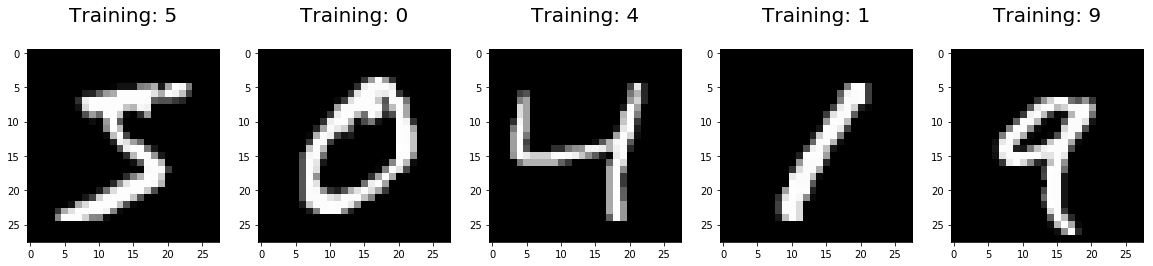

In [0]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it

logisticRegr = LogisticRegression(penalty='l1',tol=0.01,solver = 'saga',multi_class='ovr')

In [0]:
logisticRegr.fit(train_img, train_lbl)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

In [0]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([7], dtype=uint8)

In [0]:
logisticRegr.predict(test_img[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [0]:
predictions = logisticRegr.predict(test_img)

In [0]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9187


In [0]:
import numpy as np 
import matplotlib.pyplot as plt

index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
 if label != predict: 
  misclassifiedIndexes.append(index)
  index +=1

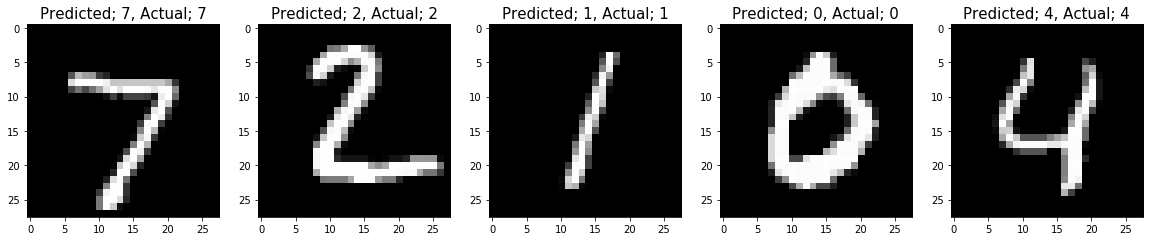

In [0]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
 plt.subplot(1, 5, plotIndex + 1)
 plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
 plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 15)
